<h1> Possum Regression </h1>
https://www.kaggle.com/datasets/abrambeyer/openintro-possum?datasetId=1534513&sortBy=voteCount
<h2> Introduction </h2>

An objective of this work is to consolidate and use part of the knowledge gained from the book "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow".

Our goal is to predict the age of given possum. The problem is supervised and multiple regression type. I will use batch learning, because there is no particular need to adjust to changing data rapidly, the dataset is small and there is no continous stream of data coming.

Root Mean Square Error (RMSE) as a performance measure is a common cost function in regression tasks, so that will be my choice.
###### OR MAYBE NOT IF F.E. THERE ARE MANY OUTLIERS

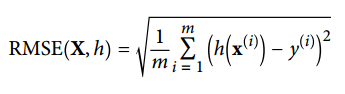

<h2> Libraries </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h2>Load the data <h2>

In [2]:
df = pd.read_csv('data/possum.csv')

<h3> Take a quick look </h3>

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [5]:
df.shape

(104, 14)

There are 14 attributes including one dependent variable - 'age' and 104 instances. It means dataset is very small by ML standards.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


<h3>Some at first glance data cleaning</h3>

In column 'age' 2 entries are missing and in column footlngth 1 entry is missing. There are no missing values in other columns. Because the gaps in the data are insignificant, we are not doing anything about it at the moment.

10 of columns are float-type. Columns of object-type are: Pop, sex. Columns of int-type are: case, site. from a dataset description we know in real that Pop, sex and site are categorical attributes.

In [7]:
df['Pop'] = df['Pop'].astype('category')
df['sex'] = df['sex'].astype('category')
df['site'] = df['site'].astype('category')

We can also change 'Pop' name column to 'pop', which fits better to other column names.

In [8]:
df = df.rename(columns={"Pop":"pop"})

The next point is, case column is useless, because rows have indexes.

In [9]:
del df['case']

In [10]:
df.head()

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [11]:
print(df['sex'].value_counts())
print(df['pop'].value_counts())

m    61
f    43
Name: sex, dtype: int64
other    58
Vic      46
Name: pop, dtype: int64


We can see that both categorical attributes are of a binary type and both values are nearly equally distributed in them.

In [12]:
df.describe()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


Summary of the numerical attributes may be useful later.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hdlngth'}>,
        <AxesSubplot:title={'center':'skullw'}>],
       [<AxesSubplot:title={'center':'totlngth'}>,
        <AxesSubplot:title={'center':'taill'}>,
        <AxesSubplot:title={'center':'footlgth'}>],
       [<AxesSubplot:title={'center':'earconch'}>,
        <AxesSubplot:title={'center':'eye'}>,
        <AxesSubplot:title={'center':'chest'}>],
       [<AxesSubplot:title={'center':'belly'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

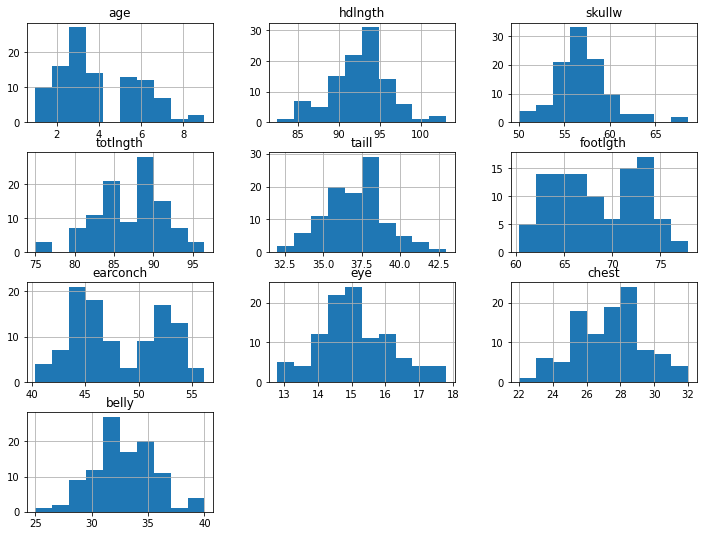

In [13]:
df.hist(figsize=(12,9))